In [1]:
!pip install profanity-check
!pip install nltk
!pip install numpy
!pip install transformers
!pip install conceptnet
!pip install better_profanity
!pip install nrclex


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.2/371.2 kB 18.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 72.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requi

In [8]:
from conceptnet5.uri import join_uri, split_uri
import requests

# Example query
concept_uri = '/c/en/student'
api_url = f'http://api.conceptnet.io{concept_uri}'

# Send HTTP GET request to ConceptNet API
response = requests.get(api_url)

# Process the response
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f'Error: Failed to fetch data. Status code: {response.status_code}')


{'@context': ['http://api.conceptnet.io/ld/conceptnet5.7/context.ld.json'], '@id': '/c/en/student', 'edges': [{'@id': '/a/[/r/AtLocation/,/c/en/student/,/c/en/university/]', '@type': 'Edge', 'dataset': '/d/conceptnet/4/en', 'end': {'@id': '/c/en/university', '@type': 'Node', 'label': 'a university', 'language': 'en', 'term': '/c/en/university'}, 'license': 'cc:by/4.0', 'rel': {'@id': '/r/AtLocation', '@type': 'Relation', 'label': 'AtLocation'}, 'sources': [{'@id': '/and/[/s/activity/omcs/omcs1_possibly_free_text/,/s/contributor/omcs/astronut/]', '@type': 'Source', 'activity': '/s/activity/omcs/omcs1_possibly_free_text', 'contributor': '/s/contributor/omcs/astronut'}, {'@id': '/and/[/s/activity/omcs/omcs1_possibly_free_text/,/s/contributor/omcs/emre/]', '@type': 'Source', 'activity': '/s/activity/omcs/omcs1_possibly_free_text', 'contributor': '/s/contributor/omcs/emre'}, {'@id': '/and/[/s/activity/omcs/vote/,/s/contributor/omcs/bjb/]', '@type': 'Source', 'activity': '/s/activity/omcs/vo

In [9]:
related_words = set()
for edge in data['edges']:
            relation=edge['rel']['label']
            if relation in ['RelatedTo', 'IsA', 'HasA']:
              related_words.add(edge['end']['label'])



print(list(related_words))


['student']


In [10]:
from conceptnet5.uri import join_uri, split_uri
import requests

def get_related_words(word):
  concept_uri='/c/en/'+word
  api_url = f'http://api.conceptnet.io{concept_uri}'
  relations = ['relatedto','formof','isa','partof','usedfor','capableof','causes','hassubevent','hasfirstsubevent','hasprerequisite','hasproperty','synonym','antonym','distinctfrom','derivedfrom','definedas','hascontext','similarto','etymologicallyrelatedto','receivesaction']


  # Send HTTP GET request to ConceptNet API
  response = requests.get(api_url)

  # Process the response
  if response.status_code == 200:
    data = response.json()
  else:
    print(f'Error: Failed to fetch data. Status code: {response.status_code}')
    return 0

  related_words = set()
  for edge in data['edges']:
            relation=edge['rel']['label']
            if relation.lower() in relations:

              related_words.add(edge['end']['label'])

  print(list(related_words))

get_related_words('sad')

['crying', 'sad', 'distressing', 'cry', 'heavyhearted']


In [33]:
import random
from transformers import pipeline
from better_profanity import profanity
from nrclex import NRCLex
import requests
import nltk
nltk.download('punkt')

from conceptnet5.uri import join_uri, split_uri

def get_related_words(word):
    concept_uri = '/c/en/' + word
    api_url = f'http://api.conceptnet.io{concept_uri}'
    relations = ['relatedto', 'formof', 'isa', 'partof', 'usedfor', 'capableof', 'causes', 'hassubevent',
                 'hasfirstsubevent', 'hasprerequisite', 'hasproperty', 'synonym', 'antonym', 'distinctfrom',
                 'derivedfrom', 'definedas', 'hascontext', 'similarto', 'etymologicallyrelatedto', 'receivesaction']

    # Send HTTP GET request to ConceptNet API
    response = requests.get(api_url)

    # Process the response
    if response.status_code == 200:
        data = response.json()
    else:
        print(f'Error: Failed to fetch data. Status code: {response.status_code}')
        return []

    related_words = set()
    for edge in data['edges']:
        relation = edge['rel']['label']
        if relation.lower() in relations:
            related_words.add(edge['end']['label'])

    return list(related_words)

def get_emotion_words(word, emotion):
    # list of words to return
    emotion_words = []
    no_emotions = []

    # check for profanity in word
    if profanity.contains_profanity(word):
        print(f'Sorry, there is no information for the word "{word}"')
        return []

    # get associated words
    usecases = get_related_words(word)

    # check emotion of each word
    for word in usecases:
        emo_dict = NRCLex(word).affect_frequencies

        # add word to emotion_words list if it has the specified emotion
        if emotion in emo_dict.keys() and emo_dict[emotion] > 0:
            emotion_words.append(word)
        else:
            no_emotions.append(word)

    if len(emotion_words) == 0:
        return no_emotions
    else:
        return emotion_words

def generate_story_with_transformer(prompt, character, emotion):
    # Load the pre-trained GPT-Neo model
    generator = pipeline("text-generation", model="gpt2")

    # Generate text based on the prompt
    generated_text = generator(prompt, max_length=200, num_return_sequences=1)[0]['generated_text']

    # Remove profanity words from the generated text
    cleaned_text = profanity.censor(generated_text)

    return cleaned_text

def generate_story(word, emotion, character):
    # Define a prompt using the keyword and emotion
    prompt = f"Generate a story advertising {word} with an emotion of {emotion} with characteristics of {character}."

    # Generate story with the transformer
    story = generate_story_with_transformer(prompt, character, emotion)
    return story

def get_story(word, emotion):
    stories = []
    words = get_emotion_words(word, emotion)
    if len(words) > 10:
        ten_words = random.sample(words, 10)
        for i in ten_words:
            stories.append(generate_story(word, emotion, i))
    else:
        for i in words:
            stories.append(generate_story(word, emotion, i))
    return stories

if __name__ == '__main__':
    word = input("Enter a word: ")
    emotion = input("Enter an emotion: ")

    output_story = get_story(word, emotion)
    output_words = get_emotion_words(word, emotion)

    print("Output Story:")
    for story in output_story:
        print(story)

    print("\nOutput Words:")
    print(output_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter a word: student
Enter an emotion: sad


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=

Output Story:
Generate a story advertising student with an emotion of sad with characteristics of fool a teacher.

In many schools, there are many different types of teacher. One is a very young school child and also many young adult students, who have trouble with emotion, or emotions of need, or a teacher who is really, really bad at these topics. An old school classroom teacher usually has one or many of these.

Examples of teacher with such different kinds of emotions:

a little kid with an easy heart, angry about losing, scared of getting hurt, very angry about losing, angry before she gets good grades, just disappointed when things go wrong, unhappy about getting the job done, annoyed, soiled about being sick, angry about money, soiled about being stressed, angry about having no energy and, on occasion, jealous, sad, very angry, soiled about being the loser, and also a very old school teacher.

So far the few best examples of teacher
Generate a story advertising student with an e

In [21]:
pip install requests networkx

In [27]:
import requests

def query_conceptnet(term):
    api_url = f'http://api.conceptnet.io/c/en/{term}?limit=10'
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
        return data['edges']
    else:
        print(f'Error: Failed to fetch data. Status code: {response.status_code}')
        return []

# Example usage:
story = ['student']
edges = query_conceptnet('dog')

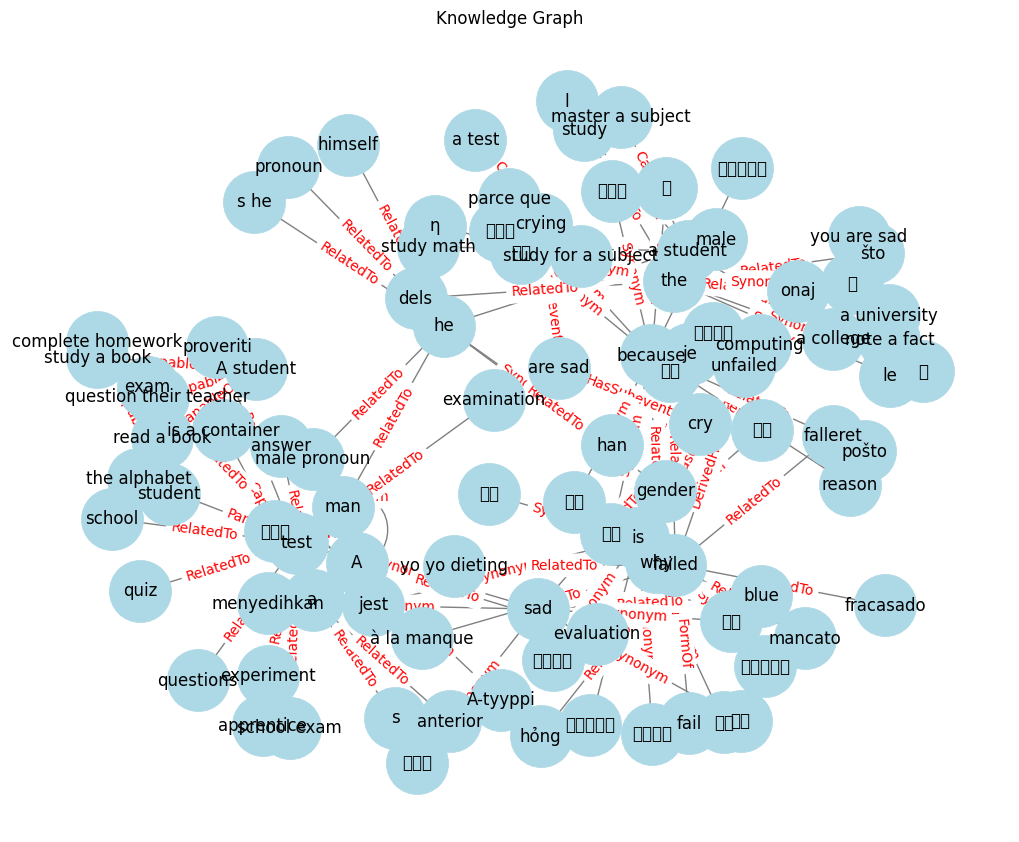

In [30]:
import requests
import networkx as nx
import matplotlib.pyplot as plt

def query_conceptnet(concept):
    """
    Query ConceptNet for information related to the given concept.
    """
    api_url = f'http://api.conceptnet.io/c/en/{concept}?limit=10'
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
        return data['edges']
    else:
        print(f'Error: Failed to fetch data for {concept}. Status code: {response.status_code}')
        return []

def create_graph(edges):
    """
    Create a knowledge graph from the retrieved ConceptNet edges.
    """
    G = nx.Graph()
    for edge in edges:
        G.add_edge(edge['start']['label'], edge['end']['label'], relation=edge['rel']['label'])
    return G

def visualize_graph(G):
    """
    Visualize the knowledge graph.
    """
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    nx.draw(G, pos, with_labels=True, node_size=2000, font_size=12, node_color='lightblue', edge_color='gray', linewidths=0.5)
    edge_labels = nx.get_edge_attributes(G, 'relation')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')
    plt.title("Knowledge Graph")
    plt.show()

# Define the story
story = "a student is sad because he failed the test"

# Extract relevant concepts from the story
concepts = story.split()

# Query ConceptNet for information related to the concepts
edges = []
for concept in concepts:
    edges.extend(query_conceptnet(concept))

# Create a knowledge graph from the retrieved edges
G = create_graph(edges)

# Visualize the knowledge graph
visualize_graph(G)


In [ ]:
import random
import requests
from conceptnet5.uri import join_uri, split_uri
from transformers import pipeline
from better_profanity import profanity
from nrclex import NRCLex

def get_related_words(word):
    concept_uri = '/c/en/' + word
    api_url = f'http://api.conceptnet.io{concept_uri}'
    relations = ['relatedto', 'formof', 'isa', 'partof', 'usedfor', 'capableof', 'causes', 'hassubevent',
                 'hasfirstsubevent', 'hasprerequisite', 'hasproperty', 'synonym', 'antonym', 'distinctfrom',
                 'derivedfrom', 'definedas', 'hascontext', 'similarto', 'etymologicallyrelatedto', 'receivesaction']

    response = requests.get(api_url)

    if response.status_code == 200:
        data = response.json()
    else:
        print(f'Error: Failed to fetch data. Status code: {response.status_code}')
        return []

    related_words = set()
    for edge in data['edges']:
        relation = edge['rel']['label']
        if relation.lower() in relations:
            related_words.add(edge['end']['label'])

    return list(related_words)

def get_emotion_words(word, emotion):
    emotion_words = []
    no_emotions = []

    if profanity.contains_profanity(word):
        print('Sorry, there is no information for this word')
        return []

    usecases = get_related_words(word)

    for word in usecases:
        emo_dict = NRCLex(word).affect_frequencies

        if emotion in emo_dict.keys() and emo_dict[emotion] > 0:
            emotion_words.append(word)
        else:
            no_emotions.append(word)

    if len(emotion_words) == 0:
        return no_emotions
    else:
        return emotion_words

def generate_story_with_transformer(prompt, character, emotion):
    generator = pipeline("text-generation", model="gpt2")

    story = generator(prompt, max_length=200, num_return_sequences=1)[0]['generated_text']
    return story

def generate_marketing_message(story, product_description):
    # Extract relevant keywords from the story
    keywords = story.split()

    # Get emotion words related to the keywords in the story
    emotion_words = []
    for keyword in keywords:
        emotion_words.extend(get_emotion_words(keyword, "sad"))

    # Generate marketing messages based on emotion words and product description
    marketing_messages = []
    for word in emotion_words:
        prompt = f"Generate a marketing message for our app promoting {word} to address sadness."
        marketing_message = generate_story_with_transformer(prompt, "our app", "hopeful")
        marketing_messages.append(marketing_message)

    return marketing_messages

# Example Usage
story = "a student is sad because he failed the test"
product_description = "our app has good math teacher to make you to get good grades"

marketing_messages = generate_marketing_message(story, product_description)
for idx, message in enumerate(marketing_messages, start=1):
    print(f"Marketing Message {idx}: {message}")


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=